# Python 101 - Python cientifico

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## matplotlib con acceso a las propiedades de los objetos gráficos
![](https://3.bp.blogspot.com/-AtPG_12l4e8/XRSuQEECZGI/AAAAAAAAHxY/ZsgtA4rMphMZujcWUur9BB-xYKoWDkKPQCLcBGAs/s1600/basics_matplotlib.PNG)

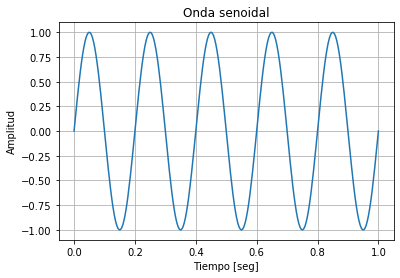

In [5]:
A, f = 1, 5
t = np.linspace(0, 1, 50 * f)
y = A * np.sin(2 * np.pi * f * t)

plt.plot(t, y)
plt.title("Onda senoidal")
plt.xlabel("Tiempo [seg]")
plt.ylabel("Amplitud")
plt.grid()

plt.show()

<class 'tuple'>


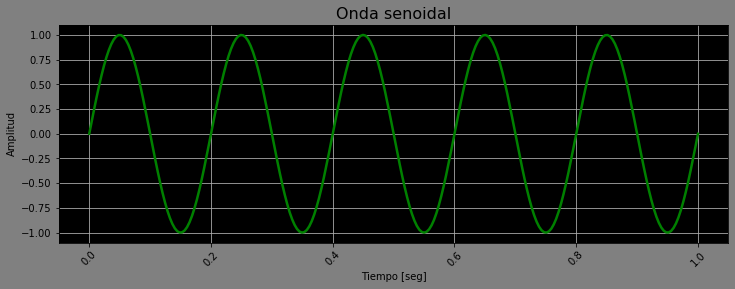

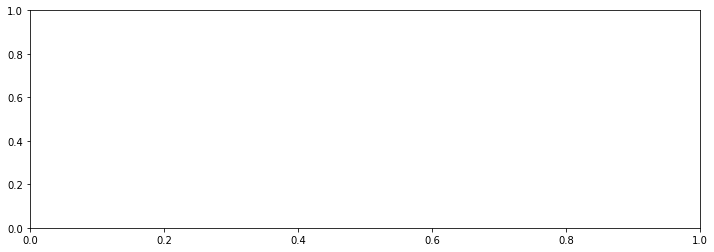

In [15]:
A, f = 1, 5
t = np.linspace(0, 1, 50 * f)
y = A * np.sin(2 * np.pi * f * t)

fig, ax = plt.subplots(figsize=(12, 4))  # retorna una tupla que contiene  la figura y al axes
print(type(plt.subplots(figsize=(12, 4))))
fig.set_facecolor('gray')

#edición de las características del axes
ax.plot(t, y, color='green', linewidth=2.5)
ax.set_facecolor('black')
ax.set_title("Onda senoidal", color='black', fontsize=16)
ax.set_xlabel("Tiempo [seg]")
ax.set_ylabel("Amplitud")
ax.tick_params(axis='x', rotation=45)

ax.grid()

plt.show()

## Analisis gráfico con matplotlib (con control de objetos graficos)

La corriente que circula a lo largo de un circuito RLC serie sometido a una señal senoidal de frecuencia $w_d$ esta dada por la fórmula:

$$E = \frac{v_m}{\sqrt{(R^2 + (w_d L - \frac{1}{(w_d C)})^2}}$$

Graficar la corriente en un circuito RLC en función de la frecuencia, para un rango de frecuencia $10 \leq w_d \leq 100000$ rad/s

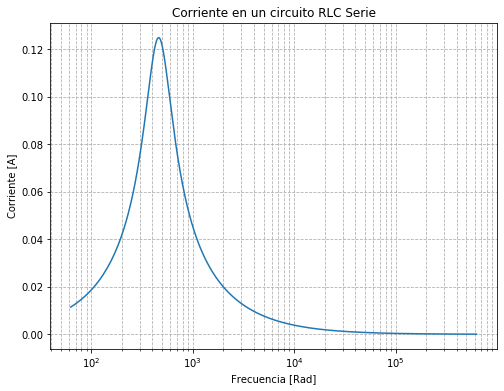

In [18]:
R, L, C, vm = 80, 260e-3, 18e-6, 10

# Vector de frecuencias
fd = np.arange(10, 100000)    # rad/seg
wd = 2 * np.pi * fd

I = vm / np.sqrt(R**2 + (wd * L - 1 / (wd * C))**2)

fig, ax = plt.subplots(figsize=(8, 6))

# https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.subplots.html
# https://matplotlib.org/3.2.1/api/axes_api.html#matplotlib.axes.Axes

ax.semilogx(wd, I)
ax.set_title("Corriente en un circuito RLC Serie")
ax.set_xlabel("Frecuencia [Rad]")
ax.set_ylabel("Corriente [A]")
ax.grid(linestyle='--', which='both')
#https://matplotlib.org/3.2.1/api/axes_api.html#ticks-and-tick-labels

plt.show()

## Calculo simbolico y conversión a arreglo numerico (lambdify)
Graficar la posicion, velocidad y aceleración de una particula, cuya posición esta definida por la función:

$$0.41t^4 - 10.8t^3 + 64t^2 + 4.4$$

      4         3       2      
0.41⋅t  - 10.8⋅t  + 64⋅t  + 4.4
      3         2        
1.64⋅t  - 32.4⋅t  + 128⋅t
      2               
4.92⋅t  - 64.8⋅t + 128


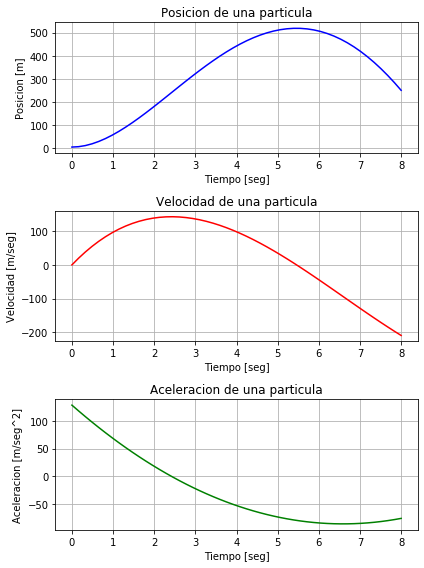

In [2]:
import sympy as sp

sp.init_printing()
t = sp.symbols('t')

x = 0.41 * t**4 - 10.8 * t**3 + 64 * t**2 + 4.4
v = sp.Derivative(x, t).doit() 
a = sp.Derivative(x, t, 2).doit()

sp.pprint(x)
sp.pprint(v)
sp.pprint(a)

fx = sp.lambdify([t], x, 'numpy')
fv = sp.lambdify([t], v, 'numpy')
fa = sp.lambdify([t], a, 'numpy')

t = np.linspace(0, 8)
x = fx(t)
v = fv(t)
a = fa(t)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(6, 8))

ax1.plot(t, x, color='b')
ax2.plot(t, v, color='r')
ax3.plot(t, a, color='g')

ax1.set_title("Posicion de una particula")
ax2.set_title("Velocidad de una particula")
ax3.set_title("Aceleracion de una particula")

ax1.set_xlabel("Tiempo [seg]")
ax2.set_xlabel("Tiempo [seg]")
ax3.set_xlabel("Tiempo [seg]")

ax1.set_ylabel("Posicion [m]")
ax2.set_ylabel("Velocidad [m/seg]")
ax3.set_ylabel("Aceleracion [m/seg^2]")

ax1.grid()
ax2.grid()
ax3.grid()

plt.tight_layout()
plt.show()

## Libreria de aplicaciones científicas (scipy)
### Ecuaciones Diferenciales Ordinarias (ODE)
#### Ejemplo 1
Resolver la ecuación diferencial:

$$\frac{dy(t)}{dt} = -ky(t), \space\space\space k = 0.3, \space y_o = 5$$

In [20]:
from scipy.integrate import odeint

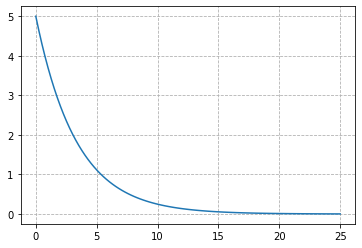

In [25]:
def model(y, t):
    # Retorna las derivadas de y respecto a t: dy/dt = model(y, t)
    k = 0.3
    return -k * y
    
t = np.linspace(0, 25, 100)
y0 = 5

sol = odeint(model, y0, t)

plt.plot(t, sol)

plt.grid(linestyle='--', which='both')
plt.show()

#### Ejemplo 2
Resolver la ecuación diferencial:

$$y'' + 2y' + 2y = cos(2x), \space\space\space y(0) = y'(0) = 0$$

Es necesario convertir la ecuación diferencial de segundo orden en dos ecuaciones de primer orden realizando un cambio de variable:

$$z \equiv y' \Rightarrow z' + 2z + 2y = cos(2x), \space\space\space z(0) = y(0) = 0$$

Haciendo los reemplazos correctos se tienen las dos siguientes ecuaciones:

$$z = y', \space\space\space z' = -2z - 2y + cos(2x)$$

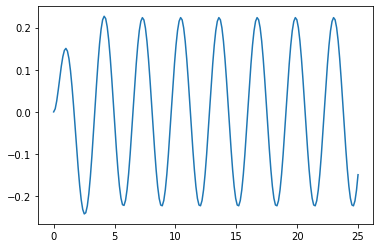

In [26]:
def model(U, x):
    # Funcion que retorna [dy/dt, dz/dt] a partir de U = [y, z]
    y = U[0]
    z = U[1]
    
    dydt = z
    dzdt = -2*z - 2*y + np.cos(2*x)
    return [dydt, dzdt]
    

U0 = [0, 0]
x = np.linspace(0, 25, 200)

sol = odeint(model, U0, x)

plt.plot(x, sol[:,0])

plt.show()

#### Ejemplo 3
Simular el modelo Presa-Depredador (ecuaciones Lotka-Voltera). Este modelo esta conformado por un par de ecuaciones diferenciales ordinarias de primer orden que representa, un modelo simplificada del cambio de la población de dos especies con interactuan por medio de la depredación. Por ejemplo, los zorros (depredadores) y los conejos (presa).

Si se tiene que *x* e *y* representan  los conejos y a los zorros, respectivamente, entonces se tendrá:

$$\frac{dx}{dt} = x(\alpha - \beta y), \space \space \space \frac{dy}{dt} = -y(\gamma - \delta x)$$

donde $\alpha, \beta, \gamma$ y $\delta$ son parametros positivos

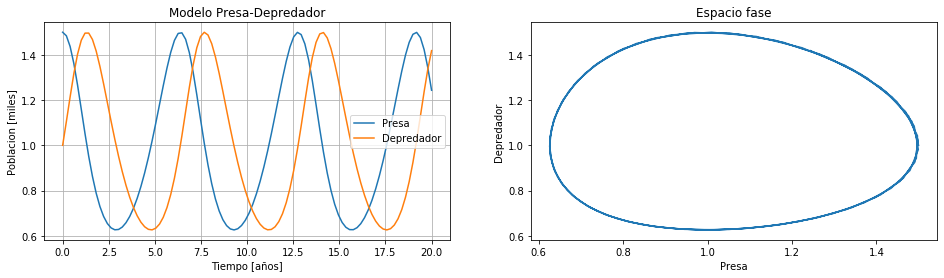

In [27]:
a = 1  # Tasa de crecimiento de las presas
b = 1  # Exito en la caza de depredador
c = 1  # Factor de mortalidad del depredador 
d = 1  # Exito en la caza y cuanto alimenta cazar una presa al depredador

def model(P, t, a, b, c, d):
    x = P[0]
    y = P[1]
    dxdt = x * (a - b * y)
    dydt = -y * (d - c * x)
    
    return [dxdt, dydt]

t = np.linspace(0, 20, 100)
P0 = [1.5, 1]
sol = odeint(model, P0, t, args=(a, b, c, d))

presa = sol[:,0]
depredador = sol[:,1]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
ax1.plot(t, presa, t, depredador)
ax1.set_title("Modelo Presa-Depredador")
ax1.set_xlabel("Tiempo [años]")
ax1.set_ylabel("Poblacion [miles]")
ax1.legend(["Presa", "Depredador"])
ax1.grid()

ax2.plot(presa, depredador)
ax2.set_title("Espacio fase")
ax2.set_xlabel("Presa")
ax2.set_ylabel("Depredador")

plt.show()

### Analisis de señales (FFT)

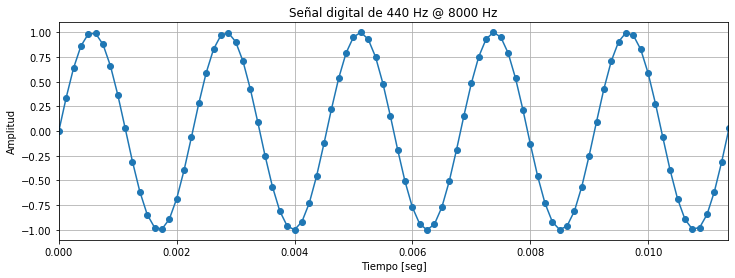

In [3]:
freq = 440       # Frecuencia de la señal
fm = 8000        # Frecuencia de muestreo (numero de muestras por segundo)
tm = 1 / fm      # Periodo de muestreo (tiempo entre muestras)
t_signal = 3     # Duracion de la señal digital

t = np.linspace(0, t_signal, t_signal * fm)
y = np.sin(2 * np.pi * freq * t).astype(np.float32)   # np.float64 por defecto

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(t, y, '-o')
ax.set_xlim(0, 5 / freq)    # Se visualizan 5 periodos (1 / freq)
ax.set_title(f"Señal digital de {freq} Hz @ {fm} Hz")
ax.set_xlabel("Tiempo [seg]")
ax.set_ylabel("Amplitud")
ax.grid()
plt.show()

In [5]:
# conda install -c anaconda pyaudio
import pyaudio

p = pyaudio.PyAudio()

stream = p.open(format=pyaudio.paFloat32, channels=1, rate=fm, output=True)
stream.write(y.tostring())      # un objeto pyaudio recibe datos binarios en forma de 'str'
stream.close()
p.terminate()

In [6]:
from scipy import fftpack

# Se generan las frecuencias de muestreo a partir de las muestras de audio
sample_freq = fftpack.fftfreq(y.size, d=tm)
sig_fft = fftpack.fft(y)

print(sig_fft[:10])

[ 1.6331673e-05-0.j         -2.8312206e-07-0.00075236j
  6.7055225e-06-0.00149905j  6.7427754e-06-0.00225837j
 -2.4363399e-06-0.00300627j  1.9088387e-05-0.00373098j
  3.2037497e-06-0.00449755j  4.4256449e-06-0.00525008j
  8.7171793e-06-0.00599842j  8.9555979e-06-0.00674961j]


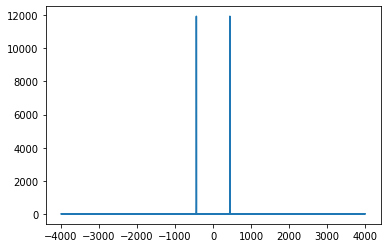

In [7]:
# Se grafica el modulo de los valores complejos del FFT
plt.plot(sample_freq, np.abs(sig_fft))
plt.show()

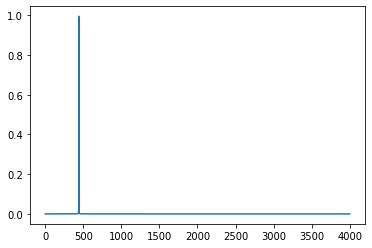

In [8]:
# Al ser la respuesta simetrica, solo se consideran las respuestas con freq positivas
pidxs = np.where(sample_freq > 0)

# Se extraen los datos de frecuencia y potencia
freqs = sample_freq[pidxs]
power = np.abs(sig_fft[pidxs]) / len(freqs)

fig, ax = plt.subplots()
ax.plot(freqs, power)
plt.show()

### Analisis de Fourier en tiempo real

In [10]:
import pyaudio
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
from tkinter import TclError
%matplotlib tk

FRAME = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100

p = pyaudio.PyAudio()
stream = p.open(format=FORMAT, channels=CHANNELS, rate=RATE, input=True, output=True, frames_per_buffer=FRAME)

# Se define el objeto grafico fig, ax
fig, ax = plt.subplots()
line, = ax.plot(np.zeros(FRAME))
ax.set_ylim(-1024, 1024)
ax.set_xlim(0, FRAME)
ax.set_xticks([])
ax.set_title("Audio en tiempo real")
ax.grid()

# Se leen los datos de la fuente de entrada
while True:
    try:
        data_in = np.frombuffer(stream.read(FRAME), dtype=np.int16)
        
        line.set_ydata(data_in)
        fig.canvas.draw()
        fig.canvas.flush_events()
        
    except TclError:
        stream.close()
        p.terminate()
        break


In [1]:
import pyaudio
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
from tkinter import TclError
%matplotlib tk

FRAME = 1024
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 8000

p = pyaudio.PyAudio()
stream = p.open(format=FORMAT, 
                channels=CHANNELS, 
                rate=RATE, 
                input=True, 
                output=True, 
                frames_per_buffer=FRAME)

# Se define el objeto grafico fig, ax
fig, (ax1, ax2) = plt.subplots(2)

line, = ax1.plot(np.zeros(FRAME))
line_fft, = ax2.plot(np.zeros(FRAME), color='k')

ax1.set_ylim(-1024, 1024)
ax1.set_xlim(0, FRAME)
ax1.set_xticks([])
ax1.set_title("Audio en tiempo real")
ax1.set_ylabel("Amplitud")
ax1.grid()

ax2.set_xlim(0, 4000)
ax2.set_ylim(0, 100)
ax2.set_xlabel("Frecuencia [Hz]")
ax2.set_ylabel("Amplitud")
ax2.grid()

while True:
    try:
        data_in = np.frombuffer(stream.read(FRAME), dtype=np.int16)
        
        sample_freq = fftpack.fftfreq(FRAME, d=1/RATE)
        sig_fft = fftpack.fft(data_in)
        
        pidxs = np.where(sample_freq > 0)
        freqs = sample_freq[pidxs]
        power = np.abs(sig_fft[pidxs] / len(freqs))
        
        line.set_ydata(data_in)
        line_fft.set_xdata(freqs)
        line_fft.set_ydata(power)
        
        fig.canvas.draw()
        fig.canvas.flush_events()
        
    except TclError:
        stream.close()
        p.terminate()
        break
